# **SIGE: Práctica 1 - Diabetes**

## 1. Exploración

In [110]:
import pandas as pd
datos = pd.read_csv("diabetes/diabetes.csv", na_values=-999, delimiter=";")

print(datos.describe())
print(datos.info())

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     60796.000000  60796.000000  60796.000000  60205.000000   
mean          0.418613      0.531926      0.501809      0.972328   
std           0.493336      0.498984      0.500001      0.164033   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.000000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  59259.000000  60796.000000  60796.000000          60195.000000   
mean      29.518588      0.471890      0.057537              0.135858   
std        7.052374      0.499213      0.232867              0.342641   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

Podemos ver bastantes tablas Si/No, 13 en total sin contar la variable objetivo ni género en principio.

In [111]:
cols = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", 
                        "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", 
                        "NoDocbcCost", "DiffWalk", "Diabetes_binary", "Sex", "GenHlth", "MentHlth", 
                        "PhysHlth", "Education"]

Guardamos las características categóticas para un posterior uso.

## 2. Tratamiento de valores perdidos

In [112]:
print(datos.isna().sum())

Diabetes_binary            0
HighBP                     0
HighChol                   0
CholCheck                591
BMI                     1537
Smoker                     0
Stroke                     0
HeartDiseaseorAttack     601
PhysActivity               0
Fruits                     0
Veggies                    0
HvyAlcoholConsump          0
AnyHealthcare              0
NoDocbcCost             5748
GenHlth                    0
MentHlth                   0
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
Education                  0
Income                   668
dtype: int64


En este ejemplo hay pocos valores perdidos y ninguna de las variables esta muy afectada por ellos, por lo que no nos planteamos la eliminación de ninguna de ellas.

Los datos numéricos los trataremos con la librería IterativeImputer y los categóricos con SimpleImputer.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

imputer = IterativeImputer(max_iter=10, random_state=12345) 
imputer2 = SimpleImputer(strategy='most_frequent')

datos_imp = datos.copy()

cols_numericas = ['BMI','Income']
datos_imp[cols_numericas] = imputer.fit_transform(datos_imp[cols_numericas])

cols_categoricas = ['CholCheck', 'HeartDiseaseorAttack', 'NoDocbcCost']
imputer2.fit(datos_imp[cols_categoricas])

datos_imp[cols_categoricas] = imputer2.fit_transform(datos_imp[cols_categoricas])

In [114]:
print(datos_imp.info())
print(datos_imp.describe())
print(datos_imp.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60796 entries, 0 to 60795
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       60796 non-null  int64  
 1   HighBP                60796 non-null  int64  
 2   HighChol              60796 non-null  int64  
 3   CholCheck             60796 non-null  float64
 4   BMI                   60796 non-null  float64
 5   Smoker                60796 non-null  int64  
 6   Stroke                60796 non-null  int64  
 7   HeartDiseaseorAttack  60796 non-null  float64
 8   PhysActivity          60796 non-null  int64  
 9   Fruits                60796 non-null  int64  
 10  Veggies               60796 non-null  int64  
 11  HvyAlcoholConsump     60796 non-null  int64  
 12  AnyHealthcare         60796 non-null  int64  
 13  NoDocbcCost           60796 non-null  float64
 14  GenHlth               60796 non-null  int64  
 15  MentHlth           

In [115]:
datos = datos_imp

## 3. Outliers

Text(0.5, 1.0, 'Diagrama de cajas con outliers')

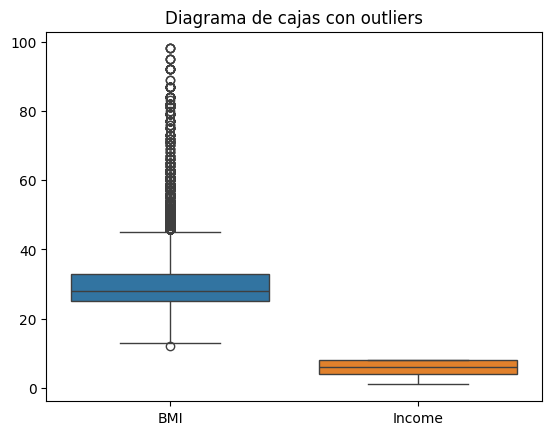

In [116]:
import seaborn as sns

datos_out = datos.copy()

bp = sns.boxplot(data=datos_out[cols_numericas])
bp.set_title('Diagrama de cajas con outliers')

Vemos que sobre las características numéricas hay valores anómalos.

In [117]:
Q1 = datos_out['BMI'].quantile(0.25)
Q3 = datos_out['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - (1.2 * IQR)
upper = Q3 + (1.2 * IQR)

outliers = datos_out[(datos_out['BMI'] < lower) | (datos_out['BMI'] > upper)]

print(len(outliers))

2867


Los calculamos y eliminamos.

Text(0.5, 1.0, 'Diagrama de cajas sin outliers')

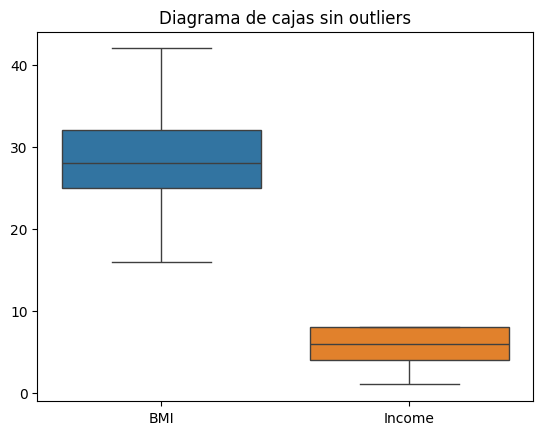

In [118]:
datos_out = datos_out.drop(outliers.index)
bp = sns.boxplot(data=datos_out[cols_numericas])
bp.set_title('Diagrama de cajas sin outliers')

In [119]:
datos = datos_out

## 4. Normalización datos numéricos 

Las características numéricas se mueven en valores muy distintos, vamos a normalizarlo entre 0 y 1.

In [120]:
from sklearn.preprocessing import MinMaxScaler

datos_norm = datos.copy()
cols_numericas = ['BMI', 'Age', 'Income']
normalizar = datos_norm[cols_numericas]

scaler = MinMaxScaler()
datos_norm[cols_numericas] = np.round(scaler.fit_transform(normalizar), decimals=4)

print(datos_norm[cols_numericas].describe())

                BMI           Age        Income
count  57929.000000  57929.000000  57929.000000
mean       0.483279      0.624523      0.692890
std        0.199937      0.243684      0.302333
min        0.000000      0.000000      0.000000
25%        0.346200      0.500000      0.428600
50%        0.461500      0.666700      0.714300
75%        0.615400      0.833300      1.000000
max        1.000000      1.000000      1.000000


In [121]:
datos = datos_norm

## 5. Selección de características

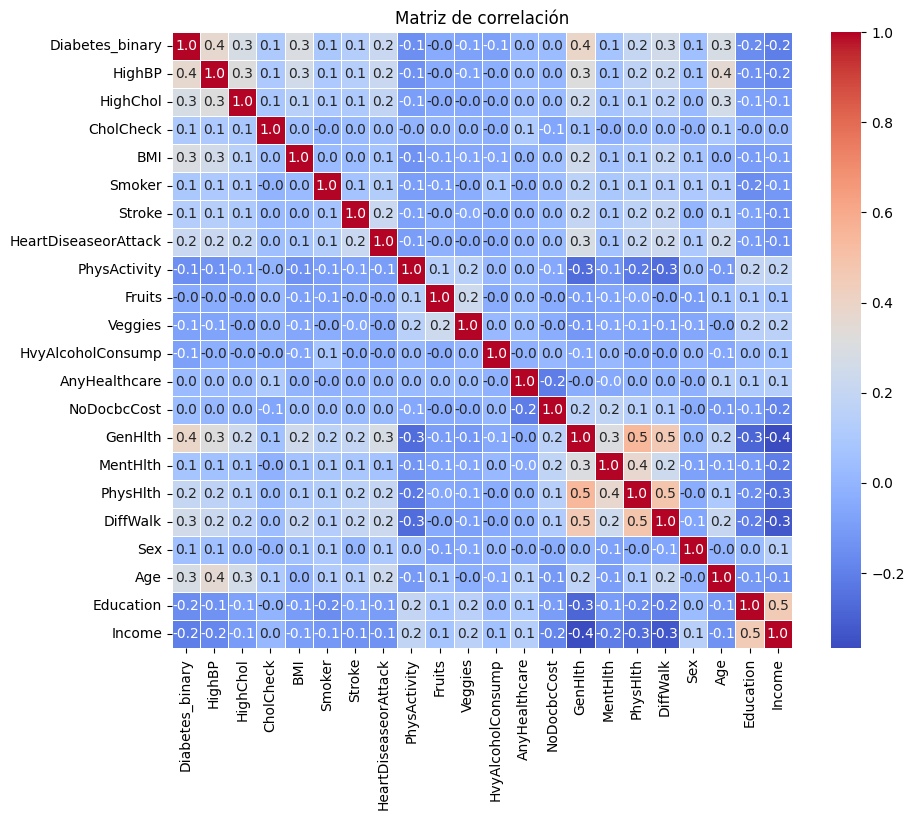

In [122]:
import matplotlib.pyplot as plt

datos_corr = datos.copy()
corr = datos_corr.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Matriz de correlación')
plt.show()

Viendo la gráfica de correlación lineal, vemos que no hay ninguna característica que influya mucho positiva o negativamente.
Por lo tanto, no reducimos las características.

## 6. Balanceo de datos

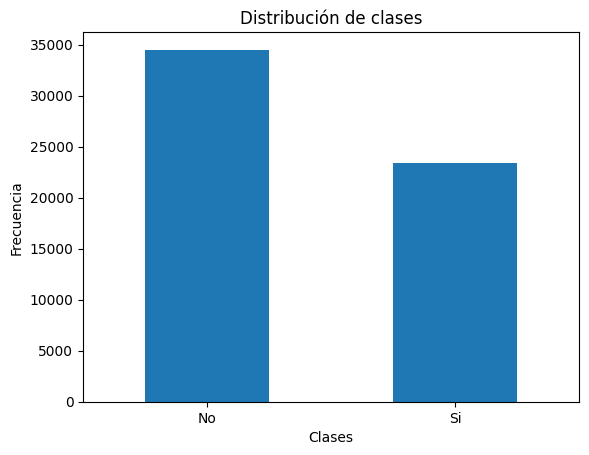

In [123]:
datos_bal = datos.copy()

clases = pd.Series(datos_bal['Diabetes_binary']).value_counts(sort = True)
clases.plot(kind='bar', rot=0) 
plt.title('Distribución de clases')
plt.xticks(range(2), ("No", "Si"))
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

Los datos estan un poco desbalanceados, vamos a arreglar el problema usando una implementacion de smote que admite valores categóricos.

In [124]:
from imblearn.over_sampling import SMOTENC

X = datos_bal.drop(columns=['Diabetes_binary'], axis=1)
y = datos_bal['Diabetes_binary']

indices = [datos.columns.get_loc(col) for col in cols]

smote = SMOTENC(categorical_features=indices, random_state=12345)
X_bal, y_bal = smote.fit_resample(X, y)

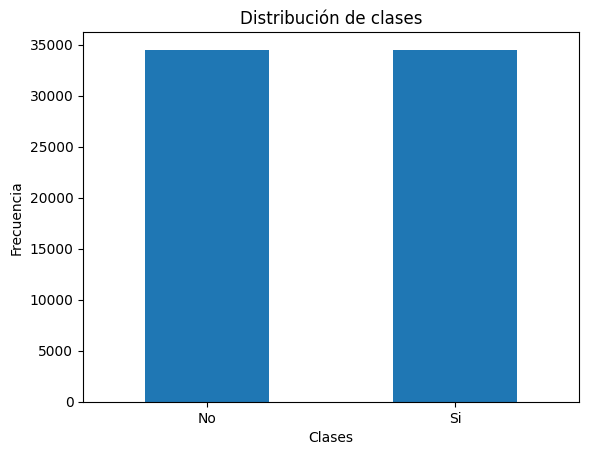

In [125]:
datos_bal = pd.concat([pd.DataFrame(X_bal, columns=X.columns), pd.DataFrame(y_bal, columns=['Diabetes_binary'])], axis=1)
clases = pd.Series(datos_bal['Diabetes_binary']).value_counts(sort = True)
clases.plot(kind='bar', rot=0) 
plt.title('Distribución de clases')
plt.xticks(range(2), ("No", "Si"))
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

Imprimimos un nuevo csv con los datos "limpios".

In [126]:
datos = datos_bal
datos.to_csv('diabetes/diabetes_clean.csv', index=False)

## 7. Implementación de modelos

Vamos a probar los datos que hemos "limpiado" con unos modelos de clasificación.

In [127]:
from sklearn.model_selection import train_test_split

X = datos.drop(columns=['Diabetes_binary'], axis=1)
y = datos['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

Para ello, entrenaremos los clasificadores **Random Forest** y **Gradient Boosting** con distintos hiperparámetros .

In [128]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rfc = RandomForestClassifier(random_state=12345)
gbc = gbc = GradientBoostingClassifier(random_state=12345)

hyper_rfc = {
    'n_estimators': [50,100,200],
    'criterion':['gini','entropy'],
    'max_depth':[3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],     
}
hyper_gbc = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

from sklearn.model_selection import RandomizedSearchCV
rs_rfc = RandomizedSearchCV(
    rfc,
    param_distributions=hyper_rfc,
    random_state=0,
    n_jobs=-1,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)
rs_gbc = RandomizedSearchCV(
    gbc,
    param_distributions=hyper_gbc,
    random_state=0,
    n_jobs=-1,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

rs_rfc.fit(X_train,y_train)
rs_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=12345),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=0, return_train_score=True, scoring='accuracy')

In [129]:
print("RFC best parametros: ",rs_rfc.best_params_)
print("RFC best score: ", rs_rfc.best_score_)

results_rfc = pd.DataFrame(rs_rfc.cv_results_)
results_sorted_rfc = results_rfc.sort_values(by='mean_test_score', ascending=False)
print(results_sorted_rfc[['params', 'mean_test_score']])

RFC best parametros:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
RFC best score:  0.7771097428467947
                                              params  mean_test_score
1  {'n_estimators': 200, 'min_samples_split': 2, ...         0.777110
7  {'n_estimators': 50, 'min_samples_split': 2, '...         0.776711
4  {'n_estimators': 200, 'min_samples_split': 5, ...         0.776585
8  {'n_estimators': 50, 'min_samples_split': 2, '...         0.776585
9  {'n_estimators': 50, 'min_samples_split': 10, ...         0.776367
5  {'n_estimators': 50, 'min_samples_split': 2, '...         0.775697
0  {'n_estimators': 100, 'min_samples_split': 10,...         0.764759
3  {'n_estimators': 100, 'min_samples_split': 5, ...         0.764759
6  {'n_estimators': 200, 'min_samples_split': 2, ...         0.758258
2  {'n_estimators': 50, 'min_samples_split': 10, ...         0.757552


In [130]:
print("GBC best parametros: ",rs_gbc.best_params_)
print("GBC best score: ", rs_gbc.best_score_)

results_gbc = pd.DataFrame(rs_gbc.cv_results_)
results_sorted_gbc = results_gbc.sort_values(by='mean_test_score', ascending=False)
print(results_sorted_gbc[['params', 'mean_test_score']])

GBC best parametros:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
GBC best score:  0.7837739949293734
                                              params  mean_test_score
0  {'n_estimators': 200, 'min_samples_split': 2, ...         0.783774
6  {'n_estimators': 200, 'min_samples_split': 5, ...         0.783339
4  {'n_estimators': 100, 'min_samples_split': 2, ...         0.782597
1  {'n_estimators': 50, 'min_samples_split': 10, ...         0.775226
5  {'n_estimators': 200, 'min_samples_split': 10,...         0.774212
7  {'n_estimators': 100, 'min_samples_split': 2, ...         0.771568
8  {'n_estimators': 100, 'min_samples_split': 2, ...         0.771188
9  {'n_estimators': 50, 'min_samples_split': 2, '...         0.768200
3  {'n_estimators': 50, 'min_samples_split': 5, '...         0.767765
2  {'n_estimators': 100, 'min_samples_split': 2, ...         0.767113


En las pruebas obtenemos que el mejor modelo es el creado en **Gradient Boosting**. Para asegurarnos probaremos los mejores modelos de ambos clasificadores con los datos de test.

In [131]:
from sklearn.metrics import accuracy_score

rs_rfc.best_estimator_.fit(X_train, y_train)
y_pred_rfc = rs_rfc.best_estimator_.predict(X_test)

rs_gbc.best_estimator_.fit(X_train, y_train)
y_pred_gbc = rs_gbc.best_estimator_.predict(X_test)

In [132]:
print("RFC accuracy: ",np.round(100 * accuracy_score(y_test,y_pred_rfc), decimals=2), "%")
print("GBC accuracy: ",np.round(100 * accuracy_score(y_test,y_pred_gbc), decimals=2), "%")

RFC accuracy:  78.09 %
GBC accuracy:  78.31 %


El modelo creado con **Gradient Boosting** usando los mejores parámetros supera en más de tres décimas al modelo **Random Forest**, lo que confirma los resultados obtenidos en los entrenamientos.

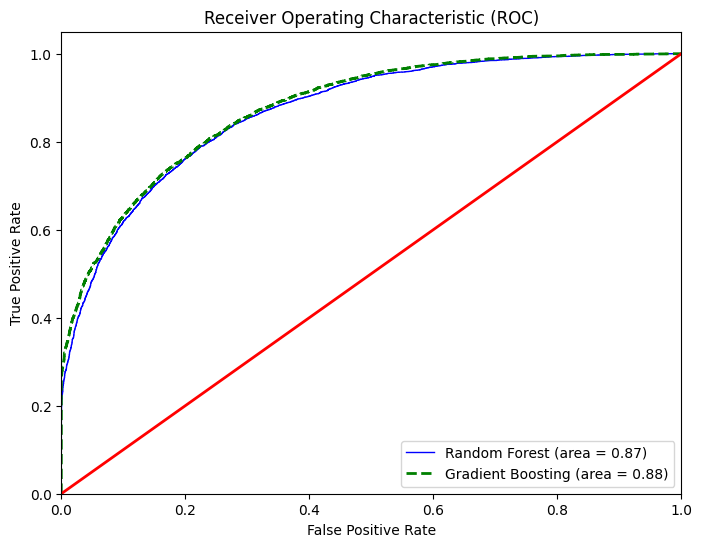

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rfc = rs_rfc.predict_proba(X_test)[:, 1]
y_prob_gbc = rs_gbc.predict_proba(X_test)[:, 1]

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_prob_rfc)

fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_prob_gbc)
roc_auc_gbc = roc_auc_score(y_test, y_prob_gbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=1, linestyle='-', label='Random Forest (area = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_gbc, tpr_gbc, color='green', lw=2, linestyle='--', label='Gradient Boosting (area = %0.2f)' % roc_auc_gbc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()